In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
ticket = 'TAEE4'
comp = 'Taesa'
compname = comp+' acoes'
path_s = 'data/stock/'+ticket+'.SA.csv'
path_b = 'data/stock/^BVSP.csv'
path_d = 'data/stock/'+ticket+'.SA_dy.csv'

ticket = path_s.split('/')[1].split('.')[0]
dfs = pd.read_csv(path_s,index_col='Date')
dfs.dropna(inplace=True)
print(dfs.shape)
dfs.head()

(1351, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-05,7.50,7.55,7.50,7.50,4.258022,2000
2017-10-06,7.49,7.49,7.49,7.49,4.252343,100
2017-10-09,7.49,7.49,7.45,7.46,4.235312,400
2017-10-10,7.49,7.49,7.49,7.49,4.252343,200
2017-10-11,7.30,7.30,7.30,7.30,4.144475,100


In [3]:
dfb = pd.read_csv(path_b,index_col='Date')
dfb.dropna(inplace=True)
dfb = dfb.add_suffix('_ibo')
print(dfb.shape)
dfb.head()

(251, 6)


,Open_ibo,High_ibo,Low_ibo,Close_ibo,Adj Close_ibo,Volume_ibo
Date,,,,,,
2022-03-10,113900.0,113939.0,111889.0,113663.0,113663.0,12984000
2022-03-11,113664.0,114627.0,111332.0,111713.0,111713.0,12475800
2022-03-14,111716.0,112299.0,109717.0,109928.0,109928.0,10480900
2022-03-15,109925.0,109925.0,107781.0,108959.0,108959.0,13653800
2022-03-16,108958.0,111183.0,108958.0,111112.0,111112.0,13205200


In [4]:

df = dfs.join(dfb)
start_end = str(df.index[0])+' '+str(df.index[-1]) # variável de início e fim do intervalo
print(start_end)
df.head()


2017-10-05 2023-03-14


,Open,High,Low,Close,Adj Close,Volume,Open_ibo,High_ibo,Low_ibo,Close_ibo,Adj Close_ibo,Volume_ibo
Date,,,,,,,,,,,,
2017-10-05,7.50,7.55,7.50,7.50,4.258022,2000,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-06,7.49,7.49,7.49,7.49,4.252343,100,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09,7.49,7.49,7.45,7.46,4.235312,400,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-10,7.49,7.49,7.49,7.49,4.252343,200,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-11,7.30,7.30,7.30,7.30,4.144475,100,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
sug_dict = pytrends.suggestions(keyword=comp)
kw_list = [ticket,comp,sug_dict[0]['title']] # # uses first sugested relationed topic as well

#pytrends.build_payload(kw_list, cat=0, timeframe='2000-03-04 2023-03-04', geo='', gprop='')
pytrends.build_payload(kw_list,cat=0,timeframe=['all','all','all'],geo='',gprop='' )#timeframe=[start_end,'1-m'])
pytrends.interest_over_time().shape
dfg = pytrends.interest_over_time()
df.index = pd.to_datetime(df.index)
""" 
dfg = dfg.reset_index()
dfg['date'] = dfg['date'].astype(str)
dfg.set_index('date', inplace=True)
type(dfg.index[0]) """


" \ndfg = dfg.reset_index()\ndfg['date'] = dfg['date'].astype(str)\ndfg.set_index('date', inplace=True)\ntype(dfg.index[0]) "

In [6]:
num_colunas = dfg.shape[1]
nome_colunas = {dfg.columns[0]: 'trend_ticket', dfg.columns[1]: 'trend_comp', dfg.columns[2]: 'trend_sugest',dfg.columns[3]:'lixo'}
dfg.rename(columns=nome_colunas, inplace=True) 

In [299]:
dfg

,trend_ticket,trend_comp,trend_sugest,lixo
date,,,,
2004-01-01,25,0,0,False
2004-02-01,24,0,0,False
2004-03-01,21,0,0,False
2004-04-01,22,0,0,False
2004-05-01,19,0,0,False
...,...,...,...,...
2023-02-01,37,0,0,False
2023-03-01,38,0,0,False
2023-04-01,34,0,0,False


In [7]:
fig = px.line(dfg,y='trend_ticket',x=dfg.index)
fig.show() # see the last available and shall get the desired estimated

In [8]:
df= df.join(dfg)

C:\Users\015025631\AppData\Local\Temp\ipykernel_21000\2326886072.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



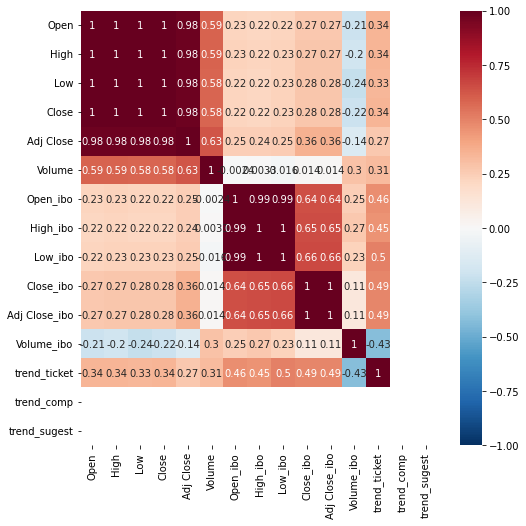

In [9]:
correlation = df.corr()
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
corr_ = {'trend_ticket':correlation['Close']['trend_ticket'],
         'trend_comp':correlation['Close']['trend_comp'],
         'trend_sugest':correlation['Close']['trend_sugest']
         } # tem ótima correlação com o progresso do preço
best_feat =  max(corr_)

In [42]:
#df.stock.value_counts(dropna=False)
df = df.dropna(subset=[best_feat])

In [304]:
df

,Open,High,Low,Close,Adj Close,Volume,Open_ibo,High_ibo,Low_ibo,Close_ibo,Adj Close_ibo,Volume_ibo,trend_ticket,trend_comp,trend_sugest,lixo
Date,,,,,,,,,,,,,,,,
2004-01-01,17.142853,17.142853,17.142853,17.142853,6.943910,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,0.0,False
2004-03-01,19.999994,19.999994,19.999994,19.999994,8.101230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,0.0,False
2004-04-01,19.999994,19.999994,19.999994,19.999994,8.101230,280.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0,0.0,False
2004-06-01,15.999996,15.999996,15.999996,15.999996,6.480984,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,0.0,False
2004-07-01,15.714282,15.714282,15.714282,15.714282,6.365252,980.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,91.650002,92.110001,90.349998,91.949997,87.706085,39800.0,109524.0,110405.0,108217.0,110405.0,110405.0,14478000.0,36.0,0.0,0.0,False
2022-11-01,93.629997,96.750000,91.800003,96.360001,91.912544,18800.0,116037.0,118261.0,115547.0,116929.0,116929.0,17969700.0,38.0,0.0,0.0,False
2022-12-01,84.500000,85.800003,83.900002,85.800003,85.800003,12600.0,112479.0,112479.0,110548.0,110926.0,110926.0,15193700.0,34.0,0.0,0.0,False


In [43]:
fig = px.line(y=df['Close'],x=df.index)
fig.add_scatter(x=df.index,y=df['trend_ticket'])
fig.add_scatter(x=df.index,y=df['trend_comp'])
fig.add_scatter(x=df.index,y=df['trend_sugest'])	
fig.show()

<Axes: xlabel='Date'>

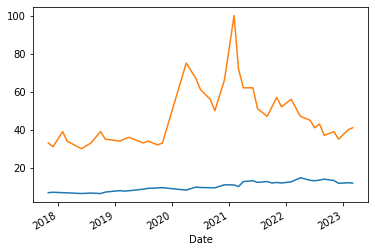

In [44]:
df['Close'].plot()
df[best_feat].plot()
#compara2['atual'].plot()

In [307]:
df

,Open,High,Low,Close,Adj Close,Volume,Open_ibo,High_ibo,Low_ibo,Close_ibo,Adj Close_ibo,Volume_ibo,trend_ticket,trend_comp,trend_sugest,lixo
Date,,,,,,,,,,,,,,,,
2004-01-01,17.142853,17.142853,17.142853,17.142853,6.943910,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,0.0,False
2004-03-01,19.999994,19.999994,19.999994,19.999994,8.101230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,0.0,False
2004-04-01,19.999994,19.999994,19.999994,19.999994,8.101230,280.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0,0.0,False
2004-06-01,15.999996,15.999996,15.999996,15.999996,6.480984,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,0.0,False
2004-07-01,15.714282,15.714282,15.714282,15.714282,6.365252,980.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,91.650002,92.110001,90.349998,91.949997,87.706085,39800.0,109524.0,110405.0,108217.0,110405.0,110405.0,14478000.0,36.0,0.0,0.0,False
2022-11-01,93.629997,96.750000,91.800003,96.360001,91.912544,18800.0,116037.0,118261.0,115547.0,116929.0,116929.0,17969700.0,38.0,0.0,0.0,False
2022-12-01,84.500000,85.800003,83.900002,85.800003,85.800003,12600.0,112479.0,112479.0,110548.0,110926.0,110926.0,15193700.0,34.0,0.0,0.0,False


In [45]:
dff = df[[best_feat,'Close']].copy()

### Treinando modelo

In [46]:

x=dff.loc[:, best_feat].values


y = dff.loc[:,'Close'].values

y = y.reshape(-1, 1)
x = x.reshape(-1, 1)
bp = int(x.shape[0]*0.8)

x_train = x[0:bp]
y_train = y[0:bp]
x_test = x[bp-1:]
y_test = y[bp-1:]
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
#--------------------------------------------------
regressorRF = RandomForestRegressor(n_estimators = 50,random_state = 42) 
regressorRF.fit(x_train, y_train)
#---------------------------------------------------
regressorRi = Ridge(alpha=.1)
regressorRi.fit(x_train, y_train)
previsao1 = regressorRF.predict(x_test)
previsao2 = regressorRi.predict(x_test)

(9, 1) (9, 1) (32, 1) (32, 1)


C:\Users\015025631\AppData\Local\Temp\ipykernel_25404\1507396330.py:20: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### Analisando performance

In [47]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, previsao1))
print(mean_squared_error(y_test, previsao2))

25.78757574172839
16.88363720061646


In [48]:
combined1 = np.concatenate((previsao1.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)

combined2 = np.concatenate((previsao2.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)

compara1 = pd.DataFrame(combined1,columns=['pred','atual'])

compara2 = pd.DataFrame(combined2,columns=['pred','atual'])


In [49]:
max(df['Close'])

14.73

<Axes: >

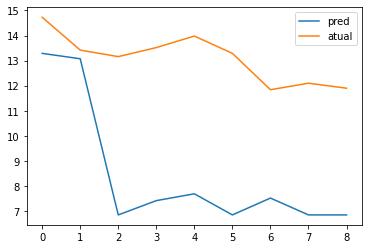

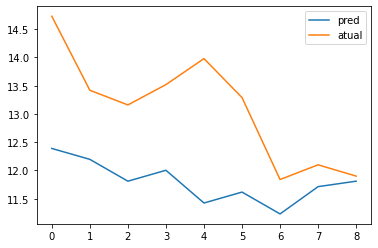

In [50]:
compara2['pred'] = compara2['pred']*1.3 #aumento artificial para melhorar as previsões
compara1.plot() #Random Forest
compara2.plot() #Ridge

In [51]:
fig = px.line(compara2,x=compara2.index,y=['pred','atual'])
fig.show()

In [58]:
previsao1 = regressorRi.predict([[3]])

In [59]:
previsao1*1.3

array([[8.14030993]])